In [1]:
import numpy as np
import pandas as pd
from fastai2.collab import *

In [2]:
ratings = pd.read_csv('train.csv')
ratings.overall = ratings.overall.astype('int32')

In [3]:
ratings = ratings[['userid','itemid','overall','unixReviewTime']]
ratings.columns = ['user','item','rating','timestamp']

In [4]:
ratings.head()

,user,item,rating,timestamp
0,102179,37138,5,1475539200
1,3625,17322,5,1456790400
2,39495,5600,5,1466899200
3,72854,30249,5,1378339200
4,74859,4349,5,1473811200


In [5]:
dls = CollabDataLoaders.from_df(ratings, item_name='item', bs=64)
dls.show_batch()

,user,item,rating
0,109330,15969,5
1,59060,5218,2
2,109990,18513,3
3,22280,12111,5
4,70902,6082,5
5,16129,13865,5
6,80600,7788,5
7,39831,36147,4
8,57023,7347,5
9,59828,10846,5


In [6]:
dls.classes

{'user': (#126961) ['#na#',0,1,2,3,4,6,7,8,9...],
 'item': (#41197) ['#na#',0,1,2,3,4,5,6,7,8...]}

In [7]:
# n_users = len(dls.classes['user'])
# n_items = len(dls.classes['item'])
# n_factors = 5

# user_factors = torch.randn(n_users, n_factors)
# item_factors = torch.randn(n_items, n_factors)

In [8]:
learn = collab_learner(dls, n_factors=50, y_range=(0,5.5), wd=.1)

SuggestedLRs(lr_min=0.33113112449646, lr_steep=1.5848931980144698e-06)

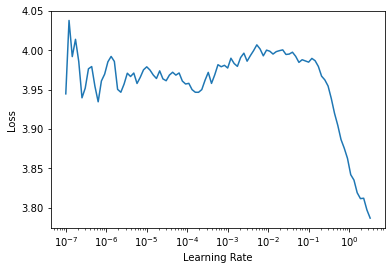

In [9]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,time
0,2.381576,2.416099,22:32
1,2.424458,2.372862,28:23
2,2.224662,2.242356,25:25
3,1.993705,2.043934,24:31
4,1.876375,1.982784,23:27


In [11]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(126961, 50)
  (i_weight): Embedding(41197, 50)
  (u_bias): Embedding(126961, 1)
  (i_bias): Embedding(41197, 1)
)

находим самые высокооцененные

In [12]:
item_bias = learn.model.i_bias.weight.squeeze()
idxs = item_bias.argsort(descending=True)[:5]
[dls.classes['item'][i] for i in idxs]

[5195, 23214, 13780, 5462, 5173]